### 1. Objective

####  To predict the prices of houses in KC 

The housing data consists of the pricing information of the houses in the US based on various attributes of the house like number of bedrooms, bathrooms, floors, view from the house, area of land, basement, above floors, etc.
Based on this set of data points, we need to build a prediction model using linear regression which will help in predicting the price of any house given a set of parameters

#### Data Dictionary

1. id - Unique ID for each home sold
2. date - Date of the home sale 
3. price - Price of each home sold 
4. bedrooms - Number of bedrooms 
5. bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
6. sqft_living - Square footage of the apartments interior living space 
7. sqft_lot - Square footage of the land space 
8. floors - Number of floors 
9. waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 
10. view - An index from 0 to 4 of how good the view of the property was 
11. condition - An index from 1 to 5 on the condition of the apartment, 
12. grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 
13. sqft_above - The square footage of the interior housing space that is above ground level 
14. sqft_basement - The square footage of the interior housing space that is below ground level 
15. yr_built - The year the house was initially built 
16. yr_renovated - The year of the house’s last renovation 
17. zipcode - What zipcode area the house is in 
18. lat - Lattitude 
19. long - Longitude 
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

### 2. Planning

1. Read the dataset
2. Find the descriptive test of the variables
3. Identify the numerical and categorical variables
4. Check for missing values and outliers and their imputation
5. Correcting the analolies
6. Dividing the data into train and test
7. Model building and validation

### 3. Exploratory Data Analysis

In [1]:
# Importing the required packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import seaborn as sns
import statsmodels.api as stm
import scipy.stats as stats
import sklearn
%matplotlib inline

#For linear Regression using the statsmodels package
import statsmodels.api as stm
np.random.seed(100)

C:\Users\Himanshu\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Reading the data set
os.chdir("C:\\Users\\Himanshu\\Desktop\\Praxis\\Machine Learning")

house = pd.read_csv('kc_house_data.csv')
house.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Finding out the number of rows and columns
house.shape

(21613, 21)

In [4]:
# Datatype of each variable
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Descriptive statistics for the variables

house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Identifying the numerical and categorical variables

def numcat(data):
    numerical = []
    categorical = []
    column = [col for col in data.columns]
    for variable in column:
        ratio = len(np.unique(house[variable]))/len(house[variable])
        if  (ratio >= 0.004) and ((house[variable].dtype == 'int64')or(house[variable].dtype == 'float64')):
            numerical.append(variable)
        else:
            categorical.append(variable)
    print('Numerical Values are: ')
    print(numerical)
    print('Categorical Values are: ')
    print(categorical)

In [7]:
numcat(house)

Numerical Values are: 
['id', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Categorical Values are: 
['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode']


In [8]:
#Checking for missing values
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# Listing the set of required categorical variables
kc = ['bedrooms','bathrooms','floors', 'waterfront','view','condition','grade']

In [10]:
kc1 = ['price','bedrooms','bathrooms', 'grade','sqft_living','sqft_lot','sqft_above','sqft_basement']
kc2 = house[['price','bedrooms','bathrooms','floors', 'grade', 'waterfront','view','condition','sqft_living','sqft_lot']]

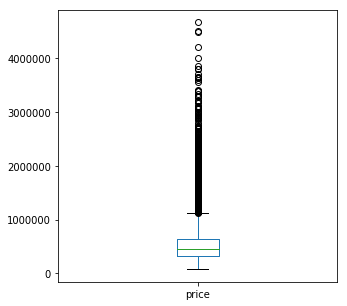

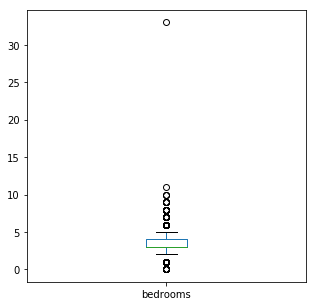

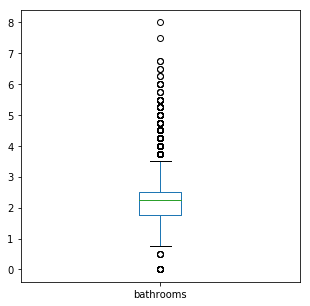

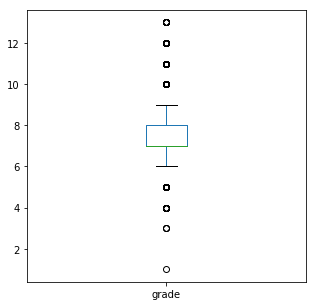

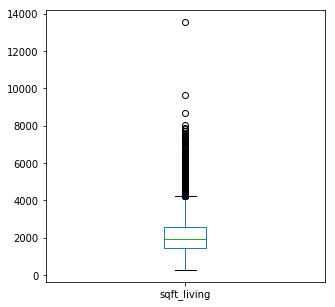

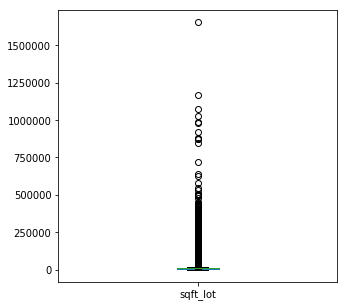

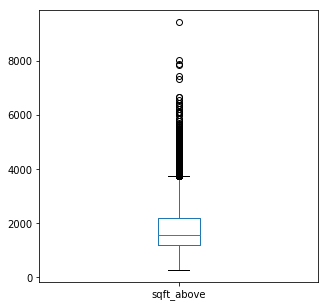

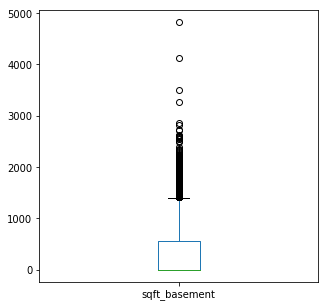

In [17]:
# Checking for outliers in each variable

for variable in kc1:
    house.boxplot(column= variable ,grid=False, figsize=(5,5))
    #plt.xlabel(variable)
    #plt.savefig(variable+'.png')
    plt.show()

 We find outliers in almost all the variables in the list kc1.
 1. We see some values in price to be exceptionally high. So, we are deleteing those records from out dataset
 2. We see some of the houses has 0 and more than 15 bedroom which is not possible in a house. So, we will replace those records with the median of bedrooms
 3. Some of the houses has 0 bathrooms even though the number of rooms  is greater than 1. So, we will replace those values with 1 implying at least 1 bathroom would be there in a house.
 4. For now we are leaving the area variables as it is. It will need futher detailing to understand these variables

In [12]:
# Removing the records with price of the house more than 5000000

house[house.price>5000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [13]:
house= house.drop(house.index[[1164,1315,1448,3914,4411,7252,9254]])
house.shape

(21606, 21)

In [14]:
house.price.describe()

count    2.160600e+04
mean     5.382739e+05
std      3.526472e+05
min      7.500000e+04
25%      3.215000e+05
50%      4.500000e+05
75%      6.450000e+05
max      4.668000e+06
Name: price, dtype: float64

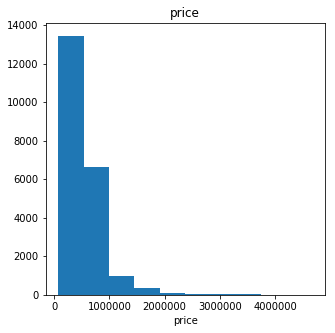

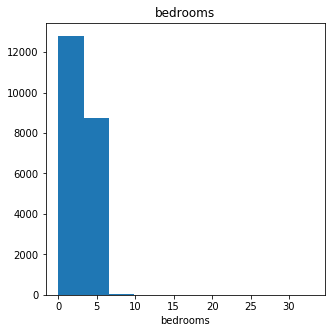

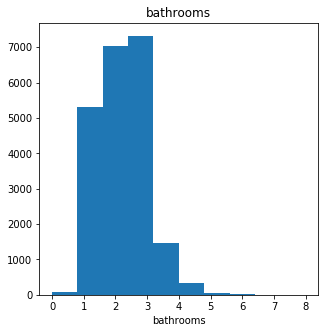

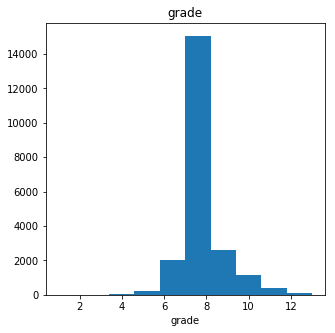

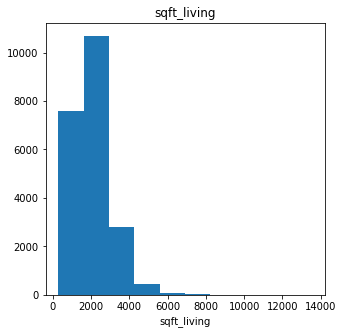

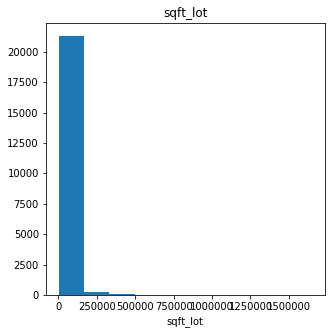

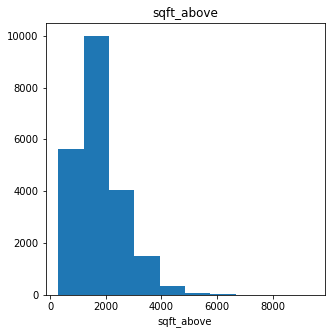

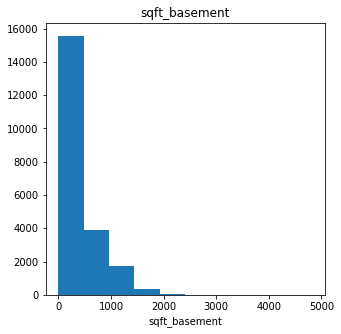

In [15]:
# Checking the distribution of each variable in the dataset

for variable in kc1:
    house.hist(column= variable,grid=False, figsize=(5,5))
    plt.xlabel(variable)
    plt.show()

1. We find most of the variables are right skewed. There are only a few data points in each variable which skews the entire distribution towars the right
2. The prices of the house are huge values, so it would be better if we take the logarithmic transformation of these values for further analysis

In [20]:
# Taking log of price
house_new = house.copy()
house_new['log_price'] = np.log(house_new.price)
house.log_price.describe()

count    21606.000000
mean        13.046984
std          0.524726
min         11.225243
25%         12.680753
50%         13.017003
75%         13.377006
max         15.356241
Name: log_price, dtype: float64

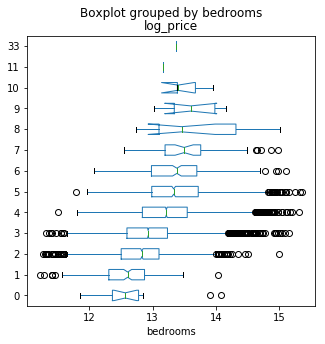

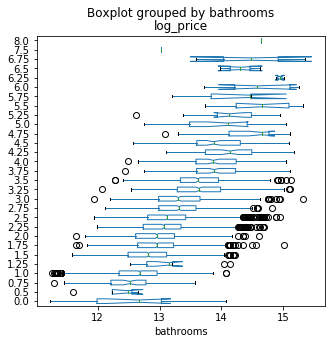

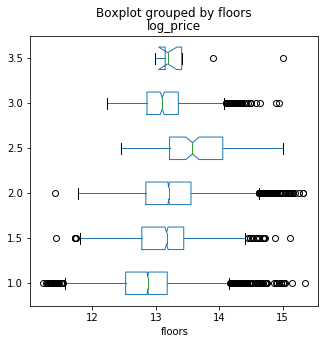

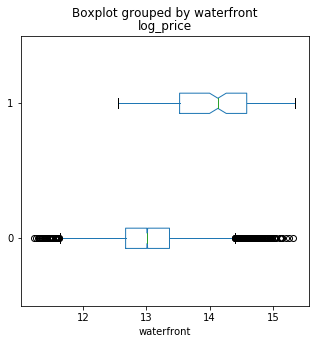

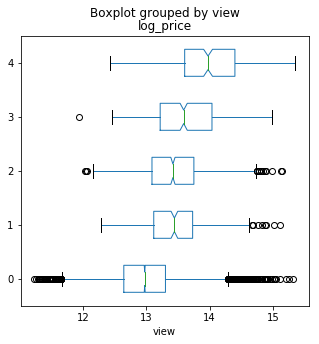

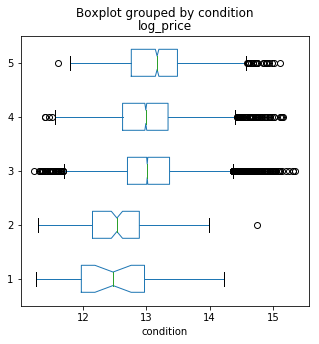

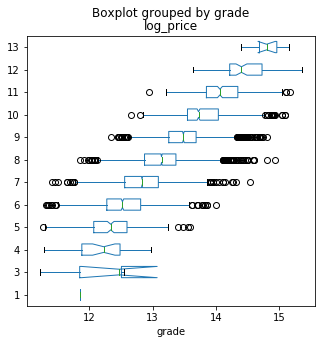

In [21]:
# Box plot for log_price grouped for each categorical variable

for variable in kc:
    house_new.boxplot(column= 'log_price',by=variable, grid=False,notch=True, vert=False, figsize=(5,5) )
    plt.show()

1. Bedrooms: As the number of bedrooms increases, the median price is also increases until 8 rooms, after which the price might decrease as well
2. When the number of bedroom varies between 2-5, the price of the houses have huge range, indicating lot of outliers in this category
3. There are lot of houses with 1-2 floors having very high prices. Interestingly, houses with 3 or more floors have their median value of price way lesser than that having less than 3 floors
4. Houses which donot have a waterfront or view have extreme prices and have lots of outliers whereas houses having waterfront or view has fewer outliers in terms of pricing of the house
5. Houses with condition 3 or more have extreme pricing
6. We will group the grade with respect to design and construction as 1-5: Low; 6-9: average; 10-13: High. So, from the boxplot above for grade, we see that houses with average design has extreme pricing which might be due to the location of the houses

In [ ]:
#house.head()

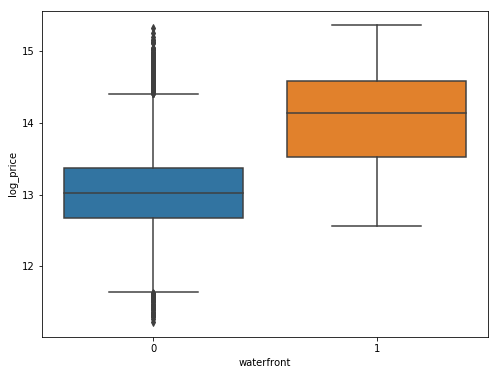

In [22]:
# Lets focus on waterfront and check how does price vary with waterfront

fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x ='waterfront', y ='log_price', data = house, ax=ax)

We see that houses having waterfront has prices much more than that not having waterfront. The 1st quartile of price for the houses having waterfront is more than the 3rd quartile of the houses not having waterfront. Now, let us see how does this vary with the grade of designing as discussed before

In [23]:
house['grade_new'] = house['grade']

In [24]:
house.grade_new[house.grade_new <= 5] = 1
house.grade_new[(house.grade_new >= 6) & (house.grade_new <= 9)] = 2
house.grade_new[house.grade_new >= 10] = 3

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


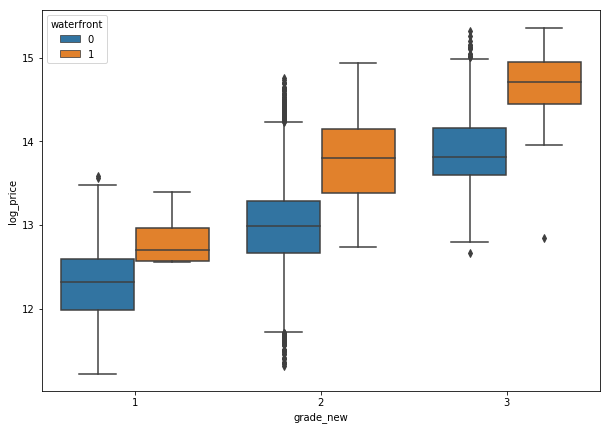

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.boxplot(x = 'grade_new', y ='log_price', data = house, hue = 'waterfront', ax=ax)

We see that the 1st quartile of price for houses with great designing and construction(grade=3) and having a waterfront is much more than the 3rd quartile of rest of the categories

#### Age of the house and price relation

In [26]:
current_year = datetime.datetime.now().year
house["age_of_house"] = current_year - house["yr_built"]

house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,grade_new,age_of_house
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,2,63
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,2,67
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,2,85
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,2,53
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,2,31


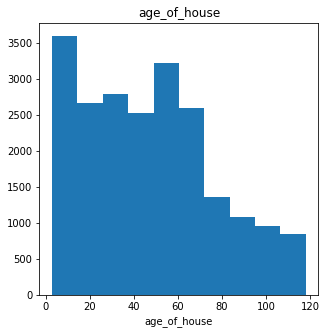

In [27]:
# Histogram for age variable

house.hist(column= 'age_of_house',grid=False, figsize=(5,5))
plt.xlabel('age_of_house')
plt.show()

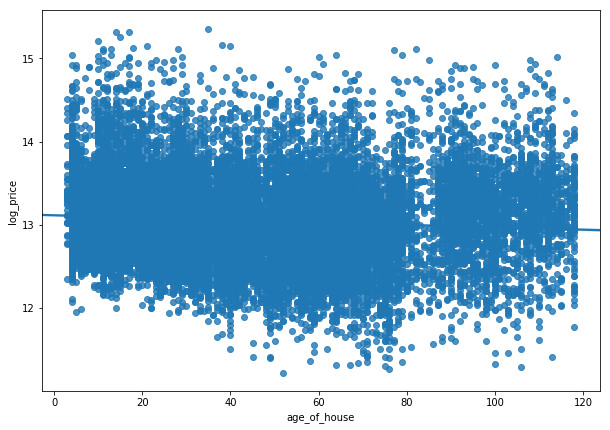

In [28]:
# Realtion of price with age of the house

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.regplot(x="age_of_house", y ="log_price",data=house)

Most of the houses has less than 80 years old. We see that the pricing of the house has a slight decreasing trend with age.

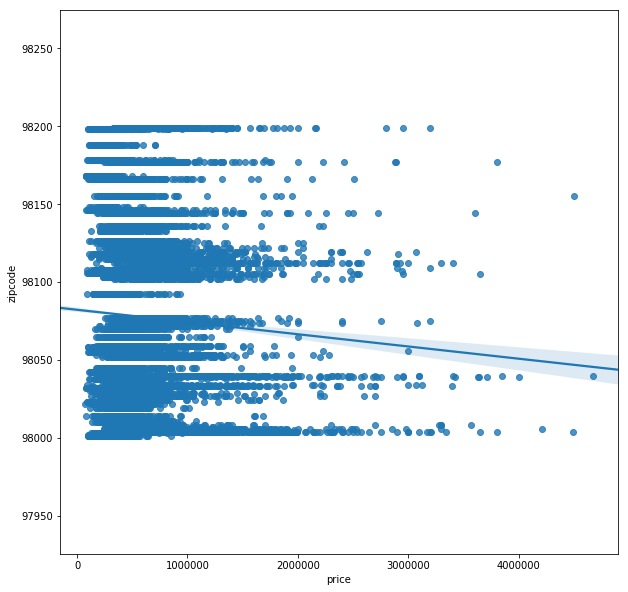

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.regplot(y = 'zipcode', x ='price', data = house_new, ax=ax)

We find that there is a trend in the price with respect to the zipcode.

### 4. Correction of Anamolies

#### Bedrooms

In [29]:
#Checking the frequency distribution of bedrooms
freq_bedrooms = pd.crosstab(index = house['bedrooms'], columns = 'count')
freq_bedrooms

col_0,count
bedrooms,
0,13
1,199
2,2760
3,9824
4,6882
5,1597
6,269
7,38
8,13


In [30]:
# Replacing the houses with 0 and 33 bedrooms with median of bedrooms
house_new = house.copy()
house_new.bedrooms[(house_new.bedrooms == 0) | (house_new.bedrooms == 33)] = house.bedrooms.median()
freq_newbedrooms = pd.crosstab(index = house_new['bedrooms'], columns = 'count')
freq_newbedrooms

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


col_0,count
bedrooms,
1,199
2,2760
3,9838
4,6882
5,1597
6,269
7,38
8,13
9,6


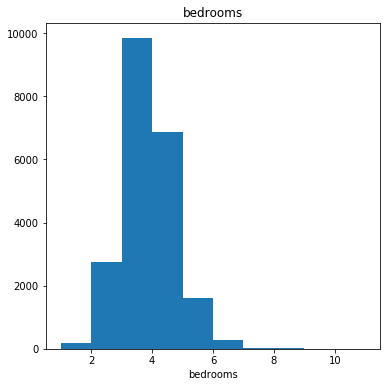

In [31]:
house_new.hist(column='bedrooms',grid=False, figsize=(6,6))
plt.xlabel('bedrooms')
plt.show()
#plt.savefig(variable+'.png')

#### Bathrooms

In [32]:
#Checking the frequency distribution of bathrooms
freq_bathrooms = pd.crosstab(index = house_new['bathrooms'], columns = 'count')
freq_bathrooms

col_0,count
bathrooms,
0.00,10
0.50,4
0.75,72
1.00,3852
1.25,9
1.50,1446
1.75,3048
2.00,1930
2.25,2047


In [33]:
# Replacing the houses with 0  bathrooms with 1
house_new.bathrooms[(house_new.bathrooms == 0)] = 1
freq_bathrooms = pd.crosstab(index = house_new['bathrooms'], columns = 'count')
freq_bathrooms

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


col_0,count
bathrooms,
0.50,4
0.75,72
1.00,3862
1.25,9
1.50,1446
1.75,3048
2.00,1930
2.25,2047
2.50,5380


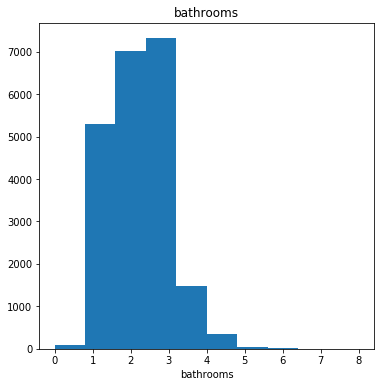

In [34]:
house.hist(column='bathrooms',grid=False, figsize=(6,6))
plt.xlabel('bathrooms')
plt.show()
#plt.savefig(variable+'.png')

### 5. Missing value imputation

In [ ]:
# No missing values in this data

### 6. Identification of important variable

#### Correlation matrix

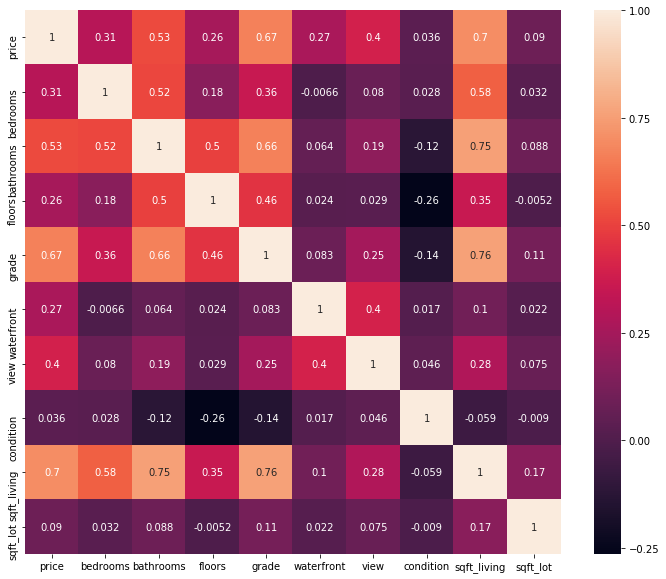

In [35]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(kc2.corr(), annot=True) 

### 7. Feature Engineering


In [36]:
# taking log of price
house['log_price'] = np.log(house_new.price)
house.log_price.describe()

count    21606.000000
mean        13.046984
std          0.524726
min         11.225243
25%         12.680753
50%         13.017003
75%         13.377006
max         15.356241
Name: log_price, dtype: float64

In [37]:
house['grade_new'] = house['grade']

In [38]:
house.grade_new[house.grade_new <= 5] = 1
house.grade_new[(house.grade_new >= 6) & (house.grade_new <= 9)] = 2
house.grade_new[house.grade_new >= 10] = 3

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
house.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,grade_new,age_of_house
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,2,63
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,2,67
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,2,85
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,2,53
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,2,31


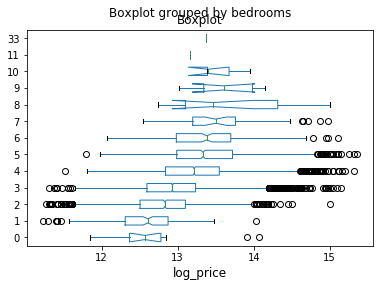

In [40]:
#Labelling the boxplot

house.boxplot(column="log_price", by='bedrooms', grid=False,notch=True, vert=False)
plt.xlabel("log_price", fontsize=12)
plt.title("Boxplot")
plt.show()

### 8. Model Fitting

#### Creating test and train data

In [41]:
def test_trainset(data, dependent_var, independent_var):  
    data['random_var'] = np.random.uniform(0,50,data.shape[0]) #Create column with random values
    data = data.sort_values('random_var') #Sort the rows according to the random values
    data = data.drop(['random_var'], axis = 1) #Drop the random values column

    ratio_value = round((data.shape[0])*0.7) # selecting the ratio value between test and train data

    #Distributing data in test and train dataset
    x_train = (data.loc[:, independent_var]).iloc[0:ratio_value]
    y_train = (data.loc[:, dependent_var]).iloc[0:ratio_value]
    x_test = (data.loc[:, independent_var]).iloc[ratio_value:data.shape[0]+1]
    y_test = (data.loc[:, dependent_var]).iloc[ratio_value:data.shape[0]+1]
    
    #Create column with constant values
    x_train = stm.add_constant(x_train)
    x_test = stm.add_constant(x_test)

    return (x_train, y_train, x_test, y_test)

#### Regression

In [47]:
def linear_reg(x_train, y_train, x_test, y_test, log = False):
    
    #Model
    model = stm.OLS(y_train, x_train).fit()
    
    #testing
    pred = model.predict(x_test)
    
    #Error values
    if log == True:
        err = np.sum((np.exp(y_test)-np.exp(pred))**2)
        rerr = np.sqrt(err/len(x_test))
    else:
        err = np.sum((y_test-pred)**2)
        rerr = np.sqrt(err/len(x_test))
        
    #returns values
    print("Error(RERR: ", rerr)
    return(model.summary())

In [62]:
x_train_new,y_train_new,x_test_new,y_test_new = test_trainset(house_new, 'price', ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','zipcode'])

In [63]:
linear_reg(x_train_new,y_train_new,x_test_new,y_test_new)

Error(RERR:  218326.63410202478


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     2173.
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:15:10   Log-Likelihood:            -2.0756e+05
No. Observations:               15124   AIC:                         4.152e+05
Df Residuals:                   15112   BIC:                         4.152e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.383e+07   3.53e+06    -12.423      0.000   -5.07e+07   -3.69e+07
sqft_living     126.9905      2.798     45.379      0.000     121.505     132.476
sqft_lot         -0.2213      0.045     -4.891      0.000      -0.310      -0.133
sqft_above       50.2481      2.724     18.446      0.000      44.909      55.588
sqft_basement    76.7388      3.436     22.331      0.000      70.003      83.475
bedrooms        -3.4e+04   2612.727    -13.013      0.000   -3.91e+04   -2.89e+04
bathrooms     -1.279e+04   4041.234     -3.164      0.002   -2.07e+04   -4864.974
floors        -6831.6019   4578.234     -1.492      0.136   -1.58e+04    2142.291
waterfront     5.613e+05   2.33e+04     24.096      0.000    5.16e+05    6.07e+05
view           5.604e+04   2768.670     20.243      0.000    5.06e+04    6.15e+04
condition      5.471e+04   2906.428     18.824      0.000     4.9e+04    6.04e+04
grade            1.1e+05   2603.933     42.255      0.000    1.05e+05    1.15e+05
zipcode         439.4030     35.948     12.223      0.000     368.941     509.865
==============================================================================
Omnibus:                     8059.604   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143835.525
Skew:                           2.160   Prob(JB):                         0.00
Kurtosis:                      17.477   Cond. No.                     5.47e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.01e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
x_train_new1,y_train_new1,x_test_new1,y_test_new1 = test_trainset(house_new, 'log_price', ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','zipcode'])

In [65]:
linear_reg(x_train_new1,y_train_new1,x_test_new1,y_test_new1, log=True)

Error(RERR:  222015.4852418888


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     2055.
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:15:17   Log-Likelihood:                -4723.5
No. Observations:               15124   AIC:                             9471.
Df Residuals:                   15112   BIC:                             9562.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -72.9516      5.261    -13.866      0.000     -83.264     -62.639
sqft_living       0.0002   4.19e-06     35.928      0.000       0.000       0.000
sqft_lot      -2.029e-08   6.76e-08     -0.300      0.764   -1.53e-07    1.12e-07
sqft_above     3.647e-05   4.08e-06      8.943      0.000    2.85e-05    4.45e-05
sqft_basement     0.0001   5.15e-06     22.150      0.000       0.000       0.000
bedrooms         -0.0131      0.004     -3.376      0.001      -0.021      -0.005
bathrooms        -0.0055      0.006     -0.917      0.359      -0.017       0.006
floors            0.0455      0.007      6.652      0.000       0.032       0.059
waterfront        0.3627      0.034     10.659      0.000       0.296       0.429
view              0.0614      0.004     14.918      0.000       0.053       0.069
condition         0.0936      0.004     21.470      0.000       0.085       0.102
grade             0.1967      0.004     50.489      0.000       0.189       0.204
zipcode           0.0009   5.36e-05     15.925      0.000       0.001       0.001
==============================================================================
Omnibus:                       21.708   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.390
Skew:                           0.045   Prob(JB):                     5.06e-06
Kurtosis:                       3.175   Cond. No.                     1.01e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 9. Model Validation

### 10. Conclusion

1. We explored the KC house data set and treated the anamolies in the data
2. Our goal was to predict the housing prices using the given features.
3. We used Scikit learn to fit linear regression to the entire data set and calculated the mean squared error.
4. Made a train-test split and calculated the mean squared error for training data and test data.
5. Generated the equation with the computed co-efficients of the variables